
----------------------
----------------------
#El Modelo SIR
---------------------
----------------------


El modelo [Susceptibles-Infectados-Recuperados (SIR)](https://culturacientifica.com/2020/08/24/el-modelo-sir-un-enfoque-matematico-de-la-propagacion-de-infecciones/) se ha utilizado ampliamente para describir la dinámica temporal de los brotes de enfermedades infecciosas. También se emplean para estimar la tasa de transmisión de una enfermedad ajustando los modelos a los datos de incidencia observados, como por ejemplo, el número de casos nuevos notificados diaria o semanalmente.

<br>

Estos modelos consideran una población fija $N$ (es decir, sin nacimientos ni muertes) con tres tipos de individuos:

<br>

- $S$: Número de individuos susceptibles en el tiempo $t$.

- $I$: Número de individuos infectados en el tiempo $t$.

- $R$: Número de individuos recuperados en el tiempo $t$,

<br>

tales que $N=S+I+R=\text{constante}$. Los parámetros adicionales del modelo son:

<br>

- $\beta$: Tasa de infección de personas suceptibles por dia.
- $\gamma$: Tasa de recuperación de personas infectadas por dia.

<br>


 El sistema de ecuaciones diferenciales que describe el modelo matematico del sistema es:

<br>


\begin{align*}
    \dfrac{d S}{dt} &= \dfrac{\beta S I}{N},\\
    \dfrac{d I}{dt} &=  \dfrac{\beta S I}{N} - \gamma I,\\
    \dfrac{d R}{dt} &= \gamma I
\end{align*}


<br>




## Experimento: Modelamiento de una epidemia con base en datos del seguimiento de una población de mil individuos.

Suponga que se realizó un estudio sobre una epidemia utilizando el modelo SIR, recopilando datos durante un período determinado de días y almacenándolos en la tabla de datos $\texttt{archivo.dat}$. Basándonos en esta información, y asumiendo que inicialmente hay una población de susceptibles a la enfermedad de $S_0 = 9990$, con $I_0 = 10$ personas infectadas y sin registros de personas recuperadas, resuelva las siguientes preguntas:


<br>

1. Estime el valor de los parametros del modelo $\beta$ y $\gamma$.

  **Ayuda:** Utlize la ecuación en diferencias asociadas al sistema. Por ejemplo;
  De la ecuación diferencial $ \dfrac{d S}{dt} = - \dfrac{\beta S I}{N}$, puede definirse la ecuación en diferencias $$\boxed{\dfrac{ \Delta S}{ \Delta t} ≈  \beta  \dfrac{ - S I}{N} }.$$


<br>

2. Usando el medoto de Adams, resuelva el modelo SIR y grafique las curvas de de evolución de las variables S, I y R.

<br>

3. Segun la curva obtenida, estime cuando sera el "pico" de la epidemia, es decir; estime cuando se dara la mayor cantidad de contagios.

<br>

4. Según las curvas obtenidas, cuando estaría recuperada mas del $90 \%$ de la población.

<br>

5. Podría ajustar este modelo para modelar el comportamiento del corona virus? Explique su respuesta.


<br>

**Nota:** En este modelo no se consideran muertes ni nacimientos, la población es fija.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import seaborn as sns

# Let's load and inspect the contents of the archivo.dat file to understand its structure.
file_path = 'archivo.dat'

# Reading the file to understand its contents
with open(file_path, 'r') as file:
    archivo = file.readlines()

# Display the first few lines to understand the structure
archivo[:10]


['# t-dias, S-(infectados), I-(infectados), R-(recuperados)\n',
 '0.000e+00 9.990e+03 1.000e+01 0.000e+00\n',
 '4.167e-02 9.989e+03 1.100e+01 0.000e+00\n',
 '8.333e-02 9.988e+03 1.200e+01 0.000e+00\n',
 '1.250e-01 9.987e+03 1.300e+01 1.000e+00\n',
 '1.667e-01 9.985e+03 1.400e+01 1.000e+00\n',
 '2.083e-01 9.984e+03 1.500e+01 1.000e+00\n',
 '2.500e-01 9.982e+03 1.600e+01 2.000e+00\n',
 '2.917e-01 9.980e+03 1.800e+01 2.000e+00\n',
 '3.333e-01 9.978e+03 1.900e+01 2.000e+00\n']

In [2]:
# Load data into a pandas DataFrame, skipping the header row.
datosRecuperados = pd.read_csv(file_path, delim_whitespace=True, skiprows=1, header=None, names=["t_days", "S", "I", "R"])

# Display the first few rows to verify the loading process
datosRecuperados.tail()


,t_days,S,I,R
475,19.79,70.0,4.0,9926.0
476,19.83,70.0,4.0,9926.0
477,19.88,70.0,4.0,9926.0
478,19.92,70.0,4.0,9926.0
479,19.96,70.0,4.0,9926.0


In [3]:
# Initialize lists to store computed beta and gamma values for each time step
beta_values = []
gamma_values = []

# Total population size (assumed constant)
N = datosRecuperados["S"][0] + datosRecuperados["I"][0] + datosRecuperados["R"][0]

# Compute beta and gamma for each time step based on difference equations
for i in range(1, len(datosRecuperados)):
    # Delta t, S, I, and R
    delta_t = datosRecuperados["t_days"][i] - datosRecuperados["t_days"][i - 1]
    S_prev, I_prev, R_prev = datosRecuperados["S"][i - 1], datosRecuperados["I"][i - 1], datosRecuperados["R"][i - 1]
    S_curr, I_curr, R_curr = datosRecuperados["S"][i], datosRecuperados["I"][i], datosRecuperados["R"][i]

    # Calculate dS/dt and dR/dt (approximated as difference)
    dS_dt = (S_curr - S_prev) / delta_t
    dR_dt = (R_curr - R_prev) / delta_t

    # Estimate beta and gamma for this step
    if I_prev != 0 and S_prev != 0:  # Avoid division by zero
        beta = -dS_dt * N / (S_prev * I_prev)
        gamma = dR_dt / I_prev
        beta_values.append(beta)
        gamma_values.append(gamma)

# Calculate the average beta and gamma
beta_est = np.mean(beta_values)
gamma_est = np.mean(gamma_values)

beta_est, gamma_est


(2.3842959491695592, 0.5004063156838655)

Parámetros estimados:

$$
\beta \approx 2.38 \quad \text{(tasa de infección)}
$$

$$
\gamma \approx 0.50 \quad \text{(tasa de recuperación)}
$$

In [4]:
# Set initial conditions based on the data
S0, I0, R0 = datosRecuperados.iloc[0][['S', 'I', 'R']]
initial_conditions = [S0, I0, R0]

In [5]:
datosRecuperados.head()

,t_days,S,I,R
0,0.00000,9990.0,10.0,0.0
1,0.04167,9989.0,11.0,0.0
2,0.08333,9988.0,12.0,0.0
3,0.12500,9987.0,13.0,1.0
4,0.16670,9985.0,14.0,1.0


In [6]:
from scipy.integrate import solve_ivp

# Define the SIR model differential equations
def sir_model(t, y, beta, gamma):
    S, I, R = y
    N = S + I + R  # Total population, assumed constant
    dS_dt = -beta * S * I / N
    dI_dt = beta * S * I / N - gamma * I
    dR_dt = gamma * I
    return [dS_dt, dI_dt, dR_dt]

# Estimate beta and gamma from the datosRecuperados (rough initial guesses)
# Using central difference for approximation
delta_t = np.mean(np.diff(datosRecuperados['t_days']))
dS_dt = np.gradient(datosRecuperados['S'], delta_t)
dI_dt = np.gradient(datosRecuperados['I'], delta_t)

# Estimate beta
beta_estimate = -np.mean(dS_dt / (datosRecuperados['S'] * datosRecuperados['I'] / (datosRecuperados['S'] + datosRecuperados['I'] + datosRecuperados['R'])))
# Estimate gamma
gamma_estimate = np.mean((dI_dt + dS_dt) / datosRecuperados['I'])

# Set initial conditions based on the datosRecuperados
S0, I0, R0 = datosRecuperados.iloc[0][['S', 'I', 'R']]
initial_conditions = [S0, I0, R0]

# Time points to solve over (covering the span of the datosRecuperados)
t_span = [datosRecuperados['t_days'].min(), datosRecuperados['t_days'].max()]
t_eval = np.linspace(t_span[0], t_span[1], len(datosRecuperados))

# Solve the SIR model using the Adams method (implemented in solve_ivp with method='RK45')
solution = solve_ivp(sir_model, t_span, initial_conditions, args=(beta_estimate, gamma_estimate),
                     t_eval=t_eval, method='RK45', dense_output=True)



In [ ]:
# Manual approximation for beta and gamma based on observed gradients (without curve fitting)
# Average dS/dt and dI/dt gradients over the initial days for a better approximation

# Recalculate dS_dt and dI_dt
dS_dt = np.gradient(datosRecuperados['S'], delta_t)
dI_dt = np.gradient(datosRecuperados['I'], delta_t)

# Estimate beta as the negative ratio of dS/dt over S*I/N
N = S0 + I0 + R0  # Total population (assuming it remains constant)
beta_approx = -np.mean(dS_dt / (datosRecuperados['S'] * datosRecuperados['I'] / N))

# Estimate gamma as the change rate of I towards recovery
gamma_approx = np.mean(-dI_dt[datosRecuperados['I'] > 0] / datosRecuperados['I'][datosRecuperados['I'] > 0])

# Solve the SIR model with approximated beta and gamma values
solution_approx = solve_ivp(sir_model, t_span, initial_conditions, args=(beta_approx, gamma_approx),
                            t_eval=t_eval, method='RK45', dense_output=True)
# define S_approx, I_approx, R_approx
S_approx, I_approx, R_approx = solution_approx.y





''' ~~ Plot the approximation results
plt.figure(figsize=(10, 6))
plt.plot(datosRecuperados['t_days'], datosRecuperados['S'], 'o', label='Susceptible (Data)', alpha=0.5)   # SUCEPTIBLE SEGUN DATOS
plt.plot(datosRecuperados['t_days'], datosRecuperados['I'], 'o', label='Infected (Data)', alpha=0.5)    # INFECTADOS SEGUN DATOS
plt.plot(datosRecuperados['t_days'], datosRecuperados['R'], 'o', label='Recovered (Data)', alpha=0.5)   # RECUPERADOS SEGUN DATOS
plt.plot(solution_approx.t, S_approx, '-', label='Susceptible (Approx Model)')  # SUCEPTIBLE SEGUN MODELO
plt.plot(solution_approx.t, I_approx, '-', label='Infected (Approx Model)')    # INFECTADOS SEGUN MODELO
plt.plot(solution_approx.t, R_approx, '-', label='Recovered (Approx Model)')    # RECUPERADOS SEGUN MODELO
plt.xlabel('Days')
plt.ylabel('Population')
plt.title('SIR Model Fit to Data (Approximated Parameters)')
plt.legend()
plt.grid()
plt.show()
'''
# Configuración de estilo para seaborn
sns.set_theme(style="ticks", context="talk")

# Figura 1: Susceptible
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='t_days', y='S', data=datosRecuperados,
    label='Susceptible (Observed Data)', marker='o', color='#1f77b4', edgecolor='w', s=100)
sns.lineplot(
    x=solution_approx.t , y=S_approx,
    label='Susceptible (Model Approximation)', color='#1f77b4', linewidth=2
)
plt.xlabel('Days', fontsize=14, weight='bold')
plt.ylabel('Population', fontsize=14, weight='bold')
# plt.yscale('log')
plt.title('SIR Model: Susceptible', fontsize=16, weight='bold', pad=20)
plt.legend(title="Legend", title_fontsize=13, fontsize=11, loc='upper right', frameon=True)
sns.despine()
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Figura 2: Infected
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='t_days', y='I', data=datosRecuperados,
    label='Infected (Observed Data)', marker='s', color='#808080', edgecolor='w', s=100
)
sns.lineplot(
    x=solution_approx.t, y=I_approx,
    label='Infected (Model Approximation)', color='#ff7f0e', linewidth=2
)
plt.xlabel('Days', fontsize=14, weight='bold')
plt.ylabel('Population', fontsize=14, weight='bold')
plt.title('SIR Model: Infected', fontsize=16, weight='bold', pad=100)
plt.legend(title="Legend", title_fontsize=13, fontsize=11, loc='upper right', frameon=True)
sns.despine()
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Figura 3: Recovered
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='t_days', y='R', data=datosRecuperados,
    label='Recovered (Observed Data)', marker='^', color='#2ca02c', edgecolor='w', s=100
)
sns.lineplot(
    x=solution_approx.t, y=R_approx,
    label='Recovered (Model Approximation)', color='#2ca02c', linewidth=2
)
plt.xlabel('Days', fontsize=14, weight='bold')
plt.ylabel('Population', fontsize=14, weight='bold')
plt.title('SIR Model: Recovered', fontsize=16, weight='bold', pad=20)
plt.legend(title="Legend", title_fontsize=13, fontsize=11, loc='upper right', frameon=True)
sns.despine()
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## Pico de la epidemia: 
Ocurre aproximadamente en el día 4.75, con un máximo de 9086 personas infectadas en ese momento.

In [ ]:
# Grafica donde se destaca el punto del pico de infectados
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='t_days', y='I', data=datosRecuperados,
    label='Infected (Observed Data)', marker='s', color='#808080', edgecolor='w', s=100
)
sns.lineplot(
    x=solution_approx.t, y=I_approx,
    label='Infected (Model Approximation)', color='#ff7f0e', linewidth=2
)
plt.xlabel('Days', fontsize=14, weight='bold')
plt.ylabel('Population', fontsize=14, weight='bold')
plt.title('SIR Model: Infected', fontsize=16, weight='bold', pad=100)
plt.legend(title="Legend", title_fontsize=13, fontsize=11, loc='upper right', frameon=True)
sns.despine()
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


## Recuperación del 90% de la población: 
Según el modelo, el 90% de la población se ha recuperado antes del día 10 o 9.

# Semejanza con el COVID
Para modelar el comportamiento del COVID-19 de forma más precisa, el modelo SIR básico podría no ser suficiente debido a algunas de sus limitaciones. El modelo SIR asume que la población es completamente susceptible al inicio, que no hay reinfecciones, y que la población permanece constante (sin nacimientos ni muertes), lo cual puede no representar adecuadamente la dinámica del COVID-19.

---
---------


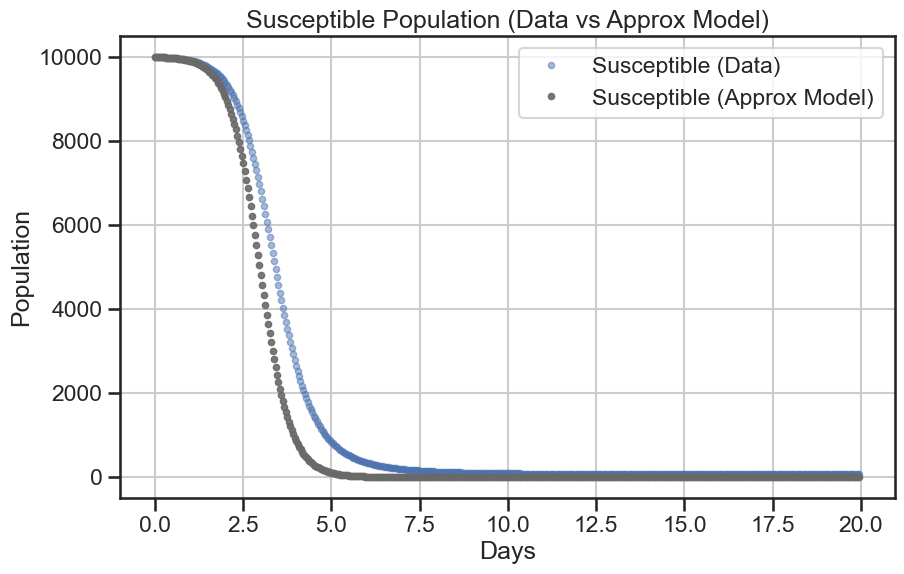

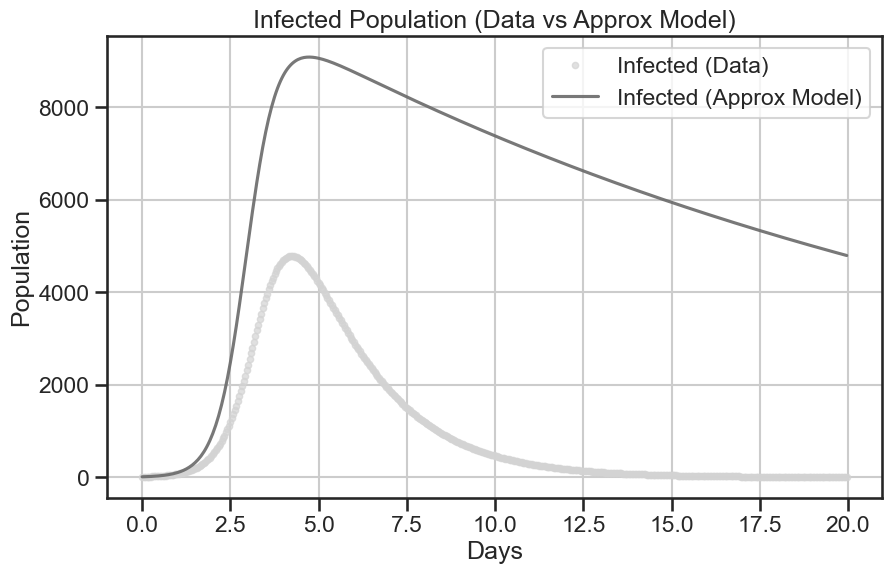

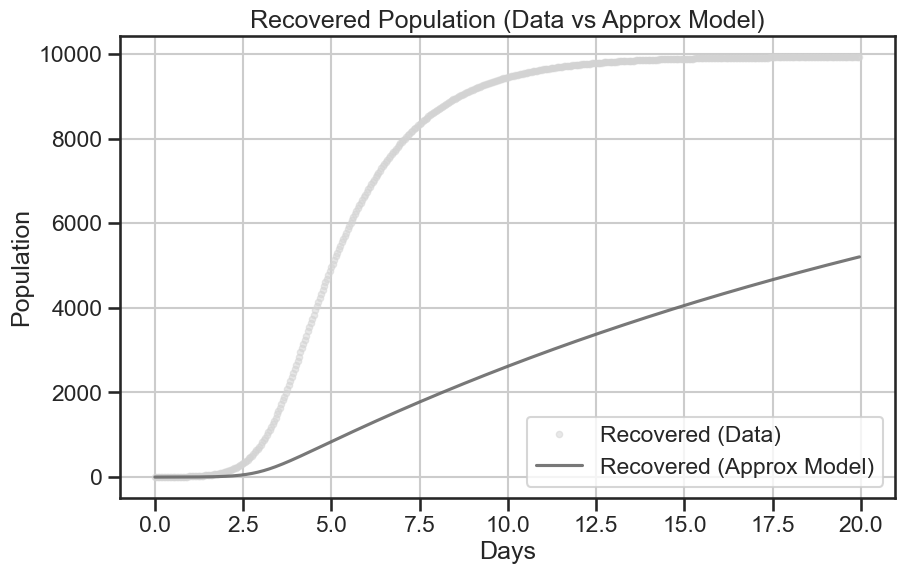

In [49]:
# Primera gráfica: Susceptible (datos y modelo)
plt.figure(figsize=(10, 6))
plt.plot(datosRecuperados['t_days'], datosRecuperados['S'], '.', label='Susceptible (Data)', alpha=0.5)  # Suceptible según datos
plt.plot(solution_approx.t, S_approx, '.', label='Susceptible (Approx Model)', alpha=0.9, color='#696969')  # Suceptible según modelo
plt.xlabel('Days')
plt.ylabel('Population')
plt.title('Susceptible Population (Data vs Approx Model)')
plt.legend()
plt.grid()
plt.show()

# Segunda gráfica: Infected (datos y modelo)
plt.figure(figsize=(10, 6))
plt.plot(datosRecuperados['t_days'], datosRecuperados['I'], '.', label='Infected (Data)', alpha=0.7, color='#D3D3D3')  # Infectados según datos
plt.plot(solution_approx.t, I_approx, '-', label='Infected (Approx Model)', alpha=0.9, color='#696969')  # Infectados según modelo
plt.xlabel('Days')
plt.ylabel('Population')
plt.title('Infected Population (Data vs Approx Model)')
plt.legend()
plt.grid()
plt.show()

# Tercera gráfica: Recovered (datos y modelo)
plt.figure(figsize=(10, 6))
plt.plot(datosRecuperados['t_days'], datosRecuperados['R'], '.', label='Recovered (Data)', alpha=0.5, color='#D3D3D3')  # Recuperados según datos
plt.plot(solution_approx.t, R_approx, '-', label='Recovered (Approx Model)', alpha=0.9, color='#696969')  # Recuperados según modelo
plt.xlabel('Days')
plt.ylabel('Population')
plt.title('Recovered Population (Data vs Approx Model)')
plt.legend()
plt.grid()
plt.show()
